### THIS IS A FIRST GLIMPSE OF THE DATA FOR THE PROJECT WIKISPEEDIA

Import Libraries 

In [1]:
import pandas as pd
import tarfile
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.parse
import requests
from bs4 import BeautifulSoup 
import os

DOWNLOAD THE DATA FROM PYTHON SCRIPT

In [2]:
directory_path = "./data"

# Vérifiez si le répertoire existe déjà
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print("Répertoire data créé")
else:
    print("Le répertoire data existe déjà.")


urls=["https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz",
      "https://snap.stanford.edu/data/wikispeedia/wikispeedia_articles_plaintext.tar.gz"]
      #,"https://snap.stanford.edu/data/wikispeedia/wikispeedia_articles_html.tar.gz"]
      #Le dernier lien contient tous les codes htm de tous les articles wikispeedia (très lourd et jsp si on va utiliser ?)

for url in urls:    
    response=requests.get(url)
    if response.status_code==200: #Verify that the response is True
        save_path="./data/"+url[43:]
        with open(save_path,"wb")as f:
            f.write(response.content)
            print(save_path+" downloaded")

PATH=["./data/wikispeedia_paths-and-graph.tar.gz",
    "./data/wikispeedia_articles_plaintext.tar.gz"]

DEST=["./data/wikispeedia_paths-and-graph",
      "./data/wikispeedia_articles_plaintext"]

for i,path in enumerate(PATH):
    with tarfile.open(path,"r:gz") as fichier:
        fichiers_names=fichier.getnames()
        for name in fichiers_names:
            fichier.extract(name, DEST[i])
        
for path in PATH:
    os.remove(path)

Le répertoire data existe déjà.
./data/wikispeedia_paths-and-graph.tar.gz downloaded
./data/wikispeedia_articles_plaintext.tar.gz downloaded


Utilisation des données sur les finished paths

In [3]:
PATH="./data/wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/paths_finished.tsv"
PATH_UNFINISHED = "./data/wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/paths_unfinished.tsv"


finished_path=pd.read_csv(PATH, header=14, delimiter="\t", names=["hashedIpAddress","timestamp","durationInSec","path","rating"])
unfinished_path=pd.read_csv(PATH_UNFINISHED, header=16, delimiter="\t", names=["hashedIpAddress","timestamp","durationInSec","path_start","path_goal","rating"])
finished_path["timestamp"]=pd.to_datetime(finished_path["timestamp"], unit ='s') #convertir le timestamp to datetime
unfinished_path["timestamp"]=pd.to_datetime(unfinished_path["timestamp"], unit ='s') #convertir le timestamp to datetime
finished_path.head()
unfinished_path.head()
print(f"Finished paths : First date {finished_path.timestamp.dt.date.min()} \t Last Date {finished_path.timestamp.dt.date.max()} ")
print(f"Unfinished paths : First date {unfinished_path.timestamp.dt.date.min()} \t Last Date {unfinished_path.timestamp.dt.date.max()} ")


Finished paths : First date 2008-08-18 	 Last Date 2014-01-15 
Unfinished paths : First date 2011-02-07 	 Last Date 2014-01-15 


                            Name  Count
0  Actors_models_and_celebrities     25
1                        Artists     36
2     Astronomers_and_physicists     21
3                       Chemists      8
4               Computing_People      9


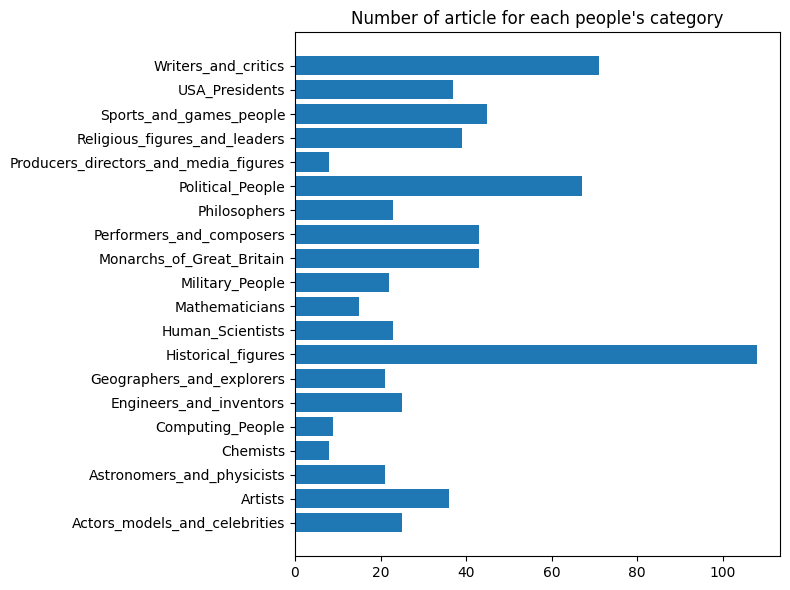

In [4]:
path = "./data/wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/categories.tsv"

categories = pd.read_csv(path,header = 12, delimiter='\t',names=["article","categories"])
categories['article'] = categories['article'].apply(lambda x :(urllib.parse.unquote(x , encoding = 'utf-8'))) # Decode article names

people = categories[categories['categories'].str.contains('subject.People')].copy() # Dataset of people
people['categories'] = people['categories'].apply(lambda x : x[len('subject.People.'):]) # Remove useless string

#print(people.head())
#print(people.shape)
#print(people.categories.unique(),len(people.categories.unique()))
counts = people.groupby('categories').count()
counts = counts.reset_index()
counts.columns = ["Name", "Count"]
print(counts.head())

plt.figure(figsize=(8, 6))

plt.barh(counts["Name"], counts['Count'])
plt.title("Number of article for each people's category")
plt.xticks(rotation=0)
plt.tight_layout()

In [5]:
people["categories"]

0                  Historical_figures
3                             Artists
7                  Historical_figures
66            Sports_and_games_people
87                 Historical_figures
                    ...              
5187               Historical_figures
5189               Historical_figures
5190               Historical_figures
5196                 Political_People
5199    Religious_figures_and_leaders
Name: categories, Length: 689, dtype: object

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


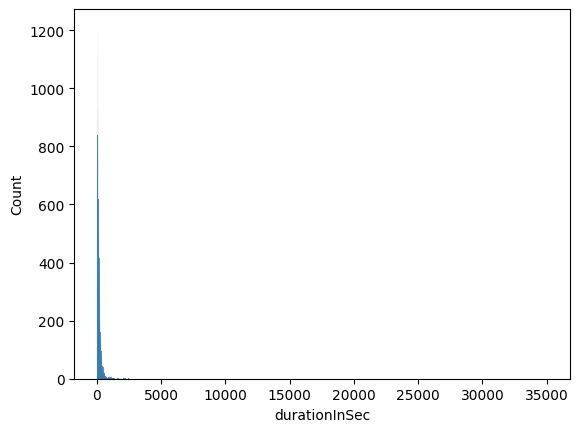

In [6]:
ax=sns.histplot(finished_path["durationInSec"], bins=10000)

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Duration [s]')

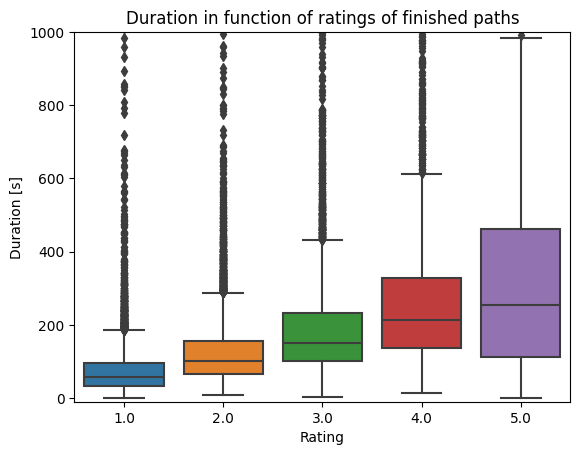

In [7]:

ax=sns.boxplot(x="rating", y="durationInSec", data=finished_path)
ax.set_ylim([-10,1000])
ax.set_title("Duration in function of ratings of finished paths")
ax.set_xlabel("Rating")
ax.set_ylabel("Duration [s]")


In [8]:
finished_path.head()

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


Chemin du trajet le plus long en temps: 91 pages


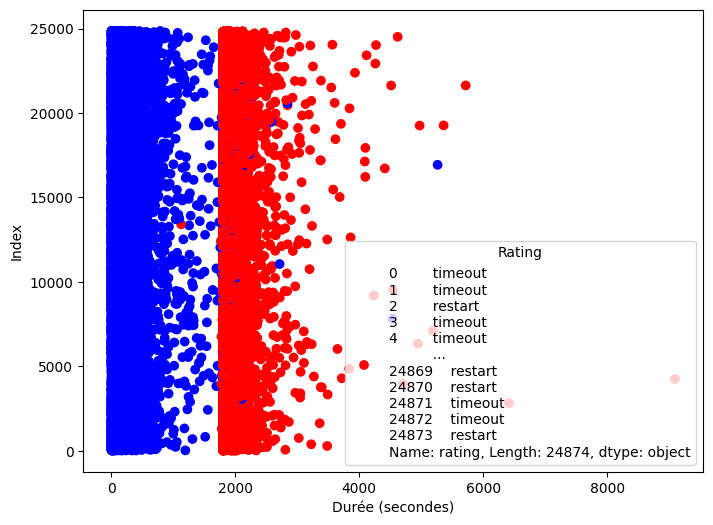

max duration for unfinished_path 151.48333333333332
max duration for finished_path 584.85


In [9]:
unfinished_path_duration = unfinished_path['durationInSec']
unfinished_path_rating = unfinished_path['rating']

max_duration_unfinished = max(unfinished_path_duration)
max_duration_finished = max(finished_path['durationInSec'])

max_duration_finished_id = finished_path.sort_values(by = 'durationInSec', ascending= False)
longest_trip = max_duration_finished_id.iloc[0]
print(f"Chemin du trajet le plus long en temps: {len(longest_trip['path'])} pages")


plt.figure(figsize=(8, 6))
colors = {'timeout': 'red', 'restart': 'blue'}
plt.scatter(unfinished_path_duration, range(len(unfinished_path)), c=[colors[r] for r in unfinished_path_rating], label=unfinished_path_rating)

plt.xlabel('Durée (secondes)')
plt.ylabel('Index')
plt.legend(title='Rating')

plt.show()

print('max duration for unfinished_path', max_duration_unfinished/60)
print('max duration for finished_path', max_duration_finished/60)


je vais essayer de stocker les pages des paths et de compter sur tous les finished path combien elles sont utilisées

In [32]:
finished_path.head()
#finished_path['path'] = finished_path['path'].apply(lambda x: x.split(';'))
finished_path


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",NaN
4,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",NaN
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3.0
51315,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",NaN
51316,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1.0


In [33]:
def get_internal_paths(path_list):
    return path_list[1:-1]

In [34]:
finished_path['internal_paths'] = finished_path['path'].apply(get_internal_paths)

internal_paths_df = finished_path.explode('internal_paths')

path_frequency = internal_paths_df['internal_paths'].value_counts().reset_index()

path_frequency.columns = ['path', 'frequency']

# Display the result
print(path_frequency)

                    path  frequency
0                      <      20561
1          United_States       8824
2                 Europe       4319
3         United_Kingdom       3860
4                  Earth       3153
...                  ...        ...
3402            Wikinews          1
3403         Zebra_shark          1
3404     Gray_reef_shark          1
3405          Blue_shark          1
3406  Arcadia_%28play%29          1

[3407 rows x 2 columns]


In [38]:
# je concatenate tout en une seule chaine de caractère
all_paths_fin = ';'.join(finished_path['path']).split(';')

# je fabrique une liste en supprimant les doublons, je calculerais ensuite la fréquence la dessus
path_fin = list(set(all_paths_fin))


# pas très beau mais bon walla ça marche
path_fin_count = {}
for path in all_paths_fin:
    if path in path_fin_count:
        path_fin_count[path] += 1
    else:
        path_fin_count[path] = 1

path_fin_count
# je vais maintenant chercher les hubs

TypeError: sequence item 0: expected str instance, list found

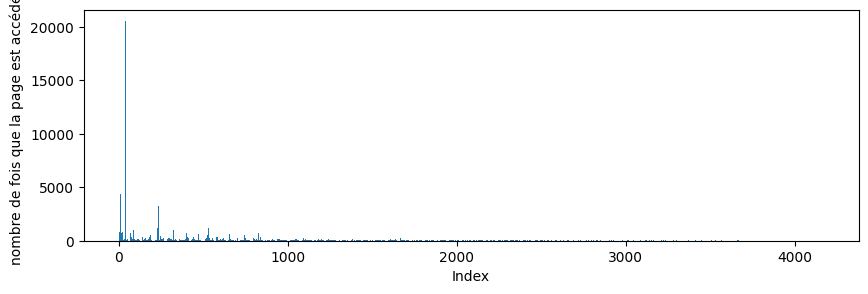

In [12]:

pages = list(path_fin_count.keys())
counts = list(path_fin_count.values())


plt.figure(figsize=(10, 3))
plt.bar(range(len(pages)), counts) 
plt.xlabel('Index')
plt.ylabel('nombre de fois que la page est accédée')
plt.show()

In [13]:
# maintenant, petit top 100 des pages 
# top 100 c'est trop grand --> top 25
top_100_fin_hubs = dict(sorted(path_fin_count.items(), key=lambda item: item[1], reverse=True)[:25])
top_100_fin_hubs

{'<': 20561,
 'United_States': 8896,
 'Europe': 4362,
 'United_Kingdom': 3904,
 'England': 3332,
 'Earth': 3223,
 'Africa': 2796,
 'World_War_II': 2301,
 'North_America': 1884,
 'Germany': 1769,
 'Animal': 1713,
 'Human': 1642,
 'Mammal': 1622,
 'France': 1617,
 'Computer': 1552,
 'Science': 1497,
 'English_language': 1430,
 'Periodic_table': 1413,
 'Atlantic_Ocean': 1324,
 'Brain': 1324,
 'Telephone': 1252,
 'India': 1236,
 'Bird': 1210,
 'Viking': 1198,
 'Agriculture': 1185}

Text(0.5, 1.0, 'Top 25 des pages les plus présentes dans les path')

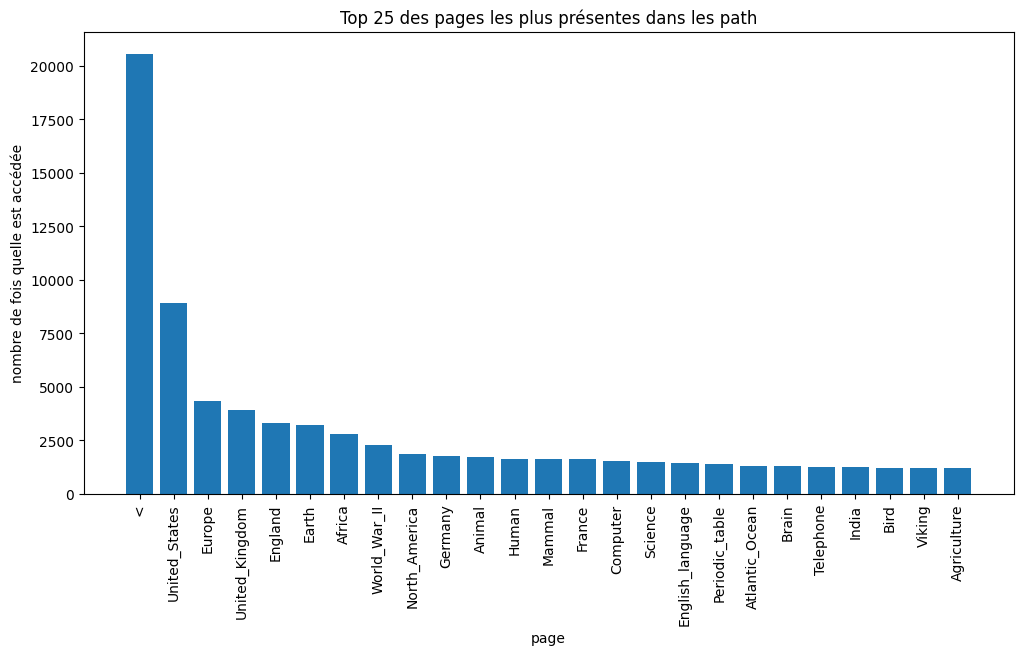

In [14]:
pages = list(top_100_fin_hubs.keys())
counts = list(top_100_fin_hubs.values())
# top 100 c'est trop grand --> top 25

plt.figure(figsize=(12, 6))
plt.bar(pages, counts) 
plt.xlabel('page')
plt.ylabel('nombre de fois quelle est accédée')
plt.xticks(rotation=90)
plt.title('Top 25 des pages les plus présentes dans les path')

marrant que la première page soit < ????? --> C'est lorsque l'utilisateur reviens sur la page précédente !


world war 2 est pas très loin dans le classement, on peut faire des recherches plus poussée pour les figures préférées de Wassim

In [15]:
print('nombre de articles dans wikispeedia :', len(path_fin_count))

nombre de articles dans wikispeedia : 4170


In [16]:
titre_de_tous_les_articles = path_fin_count.keys()

## Je vais maintenant classer les personnalités publiques :

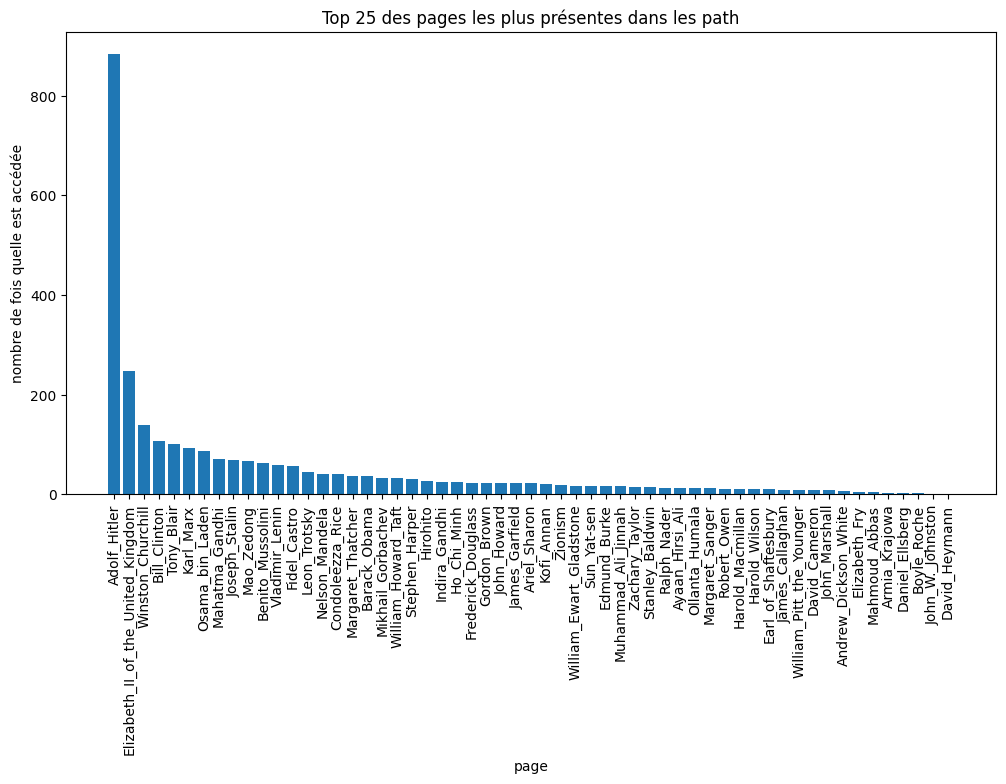

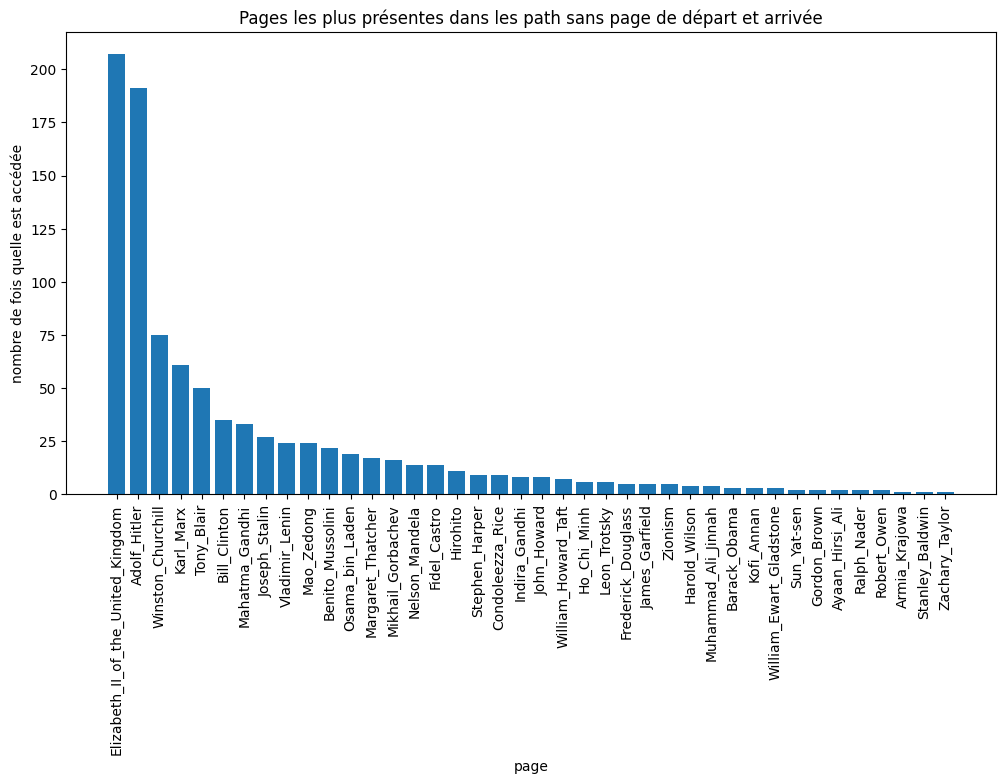

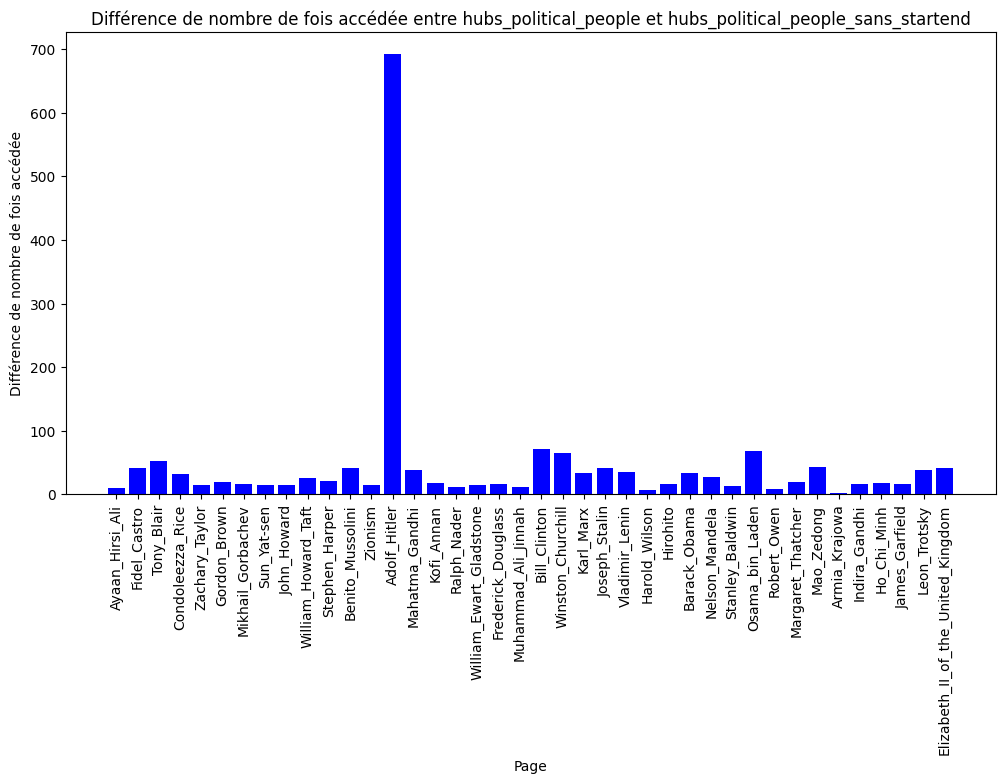

20.0
diff for AH :  692


In [65]:
import numpy as np
path_frequency_dict = path_frequency.set_index('path')['frequency'].to_dict()

all_hubs = dict(sorted(path_fin_count.items(), key=lambda item: item[1], reverse=True))
all_hubs_sans_startend = dict(sorted(path_frequency_dict.items(), key=lambda item: item[1], reverse=True))
#print(all_hubs)
hubs_people = {key: value for key, value in all_hubs.items() if key in people['article'].tolist()}
hubs_political_people = {key: value for key, value in hubs_people.items() if key in people[people['categories'] == 'Political_People']['article'].tolist()}

hubs_people_sans_startend = {key: value for key, value in all_hubs_sans_startend.items() if key in people['article'].tolist()}
hubs_political_people_sans_startend = {key: value for key, value in hubs_people_sans_startend.items() if key in people[people['categories'] == 'Political_People']['article'].tolist()}

#hubs_political_people

pages = list(hubs_political_people.keys())
counts = list(hubs_political_people.values())

plt.figure(figsize=(12, 6))
plt.bar(pages, counts) 
plt.xlabel('page')
plt.ylabel('nombre de fois quelle est accédée')
plt.xticks(rotation=90)
plt.title('Top 25 des pages les plus présentes dans les path')


pages2 = list(hubs_political_people_sans_startend.keys())
counts2 = list(hubs_political_people_sans_startend.values())

plt.figure(figsize=(12, 6))
plt.bar(pages2, counts2) 
plt.xlabel('page')
plt.ylabel('nombre de fois quelle est accédée')
plt.xticks(rotation=90)
plt.title('Pages les plus présentes dans les path sans page de départ et arrivée')

common_keys = set(hubs_political_people.keys()) & set(hubs_political_people_sans_startend.keys())

# Create a dictionary for the difference in items only for common keys
diff_items = {key: hubs_political_people[key] - hubs_political_people_sans_startend[key] for key in common_keys}

# Create a bar plot for the difference in items
plt.figure(figsize=(12, 6))
plt.bar(diff_items.keys(), diff_items.values(), color='blue')
plt.xlabel('Page')
plt.ylabel('Différence de nombre de fois accédée')
plt.xticks(rotation=90)
plt.title('Différence de nombre de fois accédée entre hubs_political_people et hubs_political_people_sans_startend')
plt.show()

diff_values = list(diff_items.values())
median_diff = np.median(diff_values)

print(median_diff)

diff_for_AH = diff_items['Adolf_Hitler']
print('diff for AH : ',diff_for_AH)

In [67]:
key_interessante = 'Adolf_Hitler'
starting_paths = finished_path[finished_path['path'].apply(lambda x: x[-1] == key_interessante)]['path'].tolist()
ending_paths = finished_path[finished_path['path'].apply(lambda x: x[0] == key_interessante)]['path'].tolist()
print(starting_paths)
print(ending_paths)


[['AIDS', '20th_century', 'World_War_II', 'Adolf_Hitler'], ['AIDS', '20th_century', 'World_War_II', 'Adolf_Hitler'], ['AIDS', 'Germany', 'Adolf_Hitler'], ['AIDS', 'Germany', 'Adolf_Hitler'], ['Aircraft', 'World_War_II', 'Adolf_Hitler'], ['Ancient_Greece', 'Europe', 'Germany', 'Adolf_Hitler'], ['Anne_Frank', 'Adolf_Hitler'], ['Ant', 'South_Africa', 'Europe', 'World_War_II', 'Adolf_Hitler'], ['Batman', 'Scotland', 'Europe', 'Germany', 'Adolf_Hitler'], ['Batman', 'Superman', 'World_War_II', 'Adolf_Hitler'], ['Batman', 'Scotland', 'Europe', 'Germany', 'Adolf_Hitler'], ['Batman', 'Scotland', 'World_War_II', 'Adolf_Hitler'], ['Batman', 'Superman', 'World_War_I', 'World_War_II', 'Adolf_Hitler'], ['Batman', 'Scotland', 'Great_Britain', 'United_Kingdom', 'World_War_II', 'Adolf_Hitler'], ['Bird', 'Wikipedia_Text_of_the_GNU_Free_Documentation_License', '<', 'Animal', 'Latin', 'Rome', 'European_Union', 'Germany', 'Adolf_Hitler'], ['Bird', 'Tuberculosis', 'World_War_II', 'Adolf_Hitler'], ['Bird', '

In [41]:
path_diff_dict = {key: path_fin_count[key] - path_frequency_dict[key] for key in path_fin_count}

KeyError: 'RER'

In [53]:
path_diff_dict = {}

for key in set(path_frequency_dict.keys()) & set(path_fin_count.keys()):
    path_diff_dict[key] = path_fin_count[key] - path_frequency_dict[key]

path_diff_dict

sorted_keys = sorted(path_diff_dict, key=path_diff_dict.get, reverse = True)

for key in sorted_keys:
    print(f"{key}: {path_diff_dict[key]}")

Telephone: 1182
Brain: 1126
Viking: 1097
Asteroid: 1079
Zebra: 985
Theatre: 961
Pyramid: 720
Adolf_Hitler: 692
Bean: 691
Batman: 617
Jesus: 342
Bird: 300
God: 271
Sun: 252
Cat: 243
Computer: 227
Dog: 219
England: 209
Great_white_shark: 204
Wood: 201
China: 193
Banana: 172
Google: 169
Beer: 167
The_Holocaust: 164
Pluto: 162
Microsoft: 161
Hydrogen: 155
Water: 155
Nintendo: 146
Moon: 137
AIDS: 130
Apple: 129
Ocean: 126
George_W._Bush: 125
Canada: 121
Flower: 121
Cheese: 118
Bible: 116
Parrot: 115
Fruit: 115
Venus: 113
Penguin: 112
Vietnam: 111
Electricity: 111
Japan: 108
Windows_Vista: 107
Brazil: 107
Music: 107
Automobile: 107
Mars: 105
Dinosaur: 104
Mario: 103
Africa: 103
Velociraptor: 101
Russia: 100
Chocolate: 99
Dolphin: 99
Citrus: 98
Whale: 97
Internet: 97
Neptune: 97
Aircraft: 95
Harry_Potter: 94
Christianity: 93
Germany: 93
Vegetable: 92
Chemistry: 92
The_Beatles: 90
Windows_XP: 90
Calculus: 89
Pac-Man: 89
Baseball: 88
Linux: 88
Athens: 87
Art: 87
Paul_McCartney: 86
Cloud: 86
Wee

KeyError: 'articles'

### Classification des people

In [18]:
politicien = people[people['categories'] == 'Political_People']

politicien = politicien.drop(columns='categories')

print(politicien.to_string(index=False))

politicien

                                                              article
                                                         Adolf_Hitler
                                                 Andrew_Dickson_White
                                                         Ariel_Sharon
                                                        Armia_Krajowa
                                                      Ayaan_Hirsi_Ali
                                                         Barack_Obama
                                                     Benito_Mussolini
                          Benjamin_Disraeli,_1st_Earl_of_Beaconsfield
                                                         Bill_Clinton
                                                          Boyle_Roche
                                                     Condoleezza_Rice
                                                    Cyrus_K._Holliday
                                                      Daniel_Ellsberg
                    

,article
133,Adolf_Hitler
271,Andrew_Dickson_White
366,Ariel_Sharon
374,Armia_Krajowa
461,Ayaan_Hirsi_Ali
...,...
5074,William_Howard_Taft
5086,William_Pitt_the_Younger
5106,Winston_Churchill
5178,Zachary_Taylor


In [19]:
politicien.loc[politicien['article'] == 'Osama_bin_Laden', 'political_affiliation'] = 'Right'

C:\Users\Admin\AppData\Local\Temp\ipykernel_19400\3477496821.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Right' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  politicien.loc[politicien['article'] == 'Osama_bin_Laden', 'political_affiliation'] = 'Right'


In [20]:
politicien.head()

,article,political_affiliation
133,Adolf_Hitler,NaN
271,Andrew_Dickson_White,NaN
366,Ariel_Sharon,NaN
374,Armia_Krajowa,NaN
461,Ayaan_Hirsi_Ali,NaN


In [21]:
politicien[politicien['political_affiliation'] == 'Left'].count()

article                  0
political_affiliation    0
dtype: int64

In [25]:
politicien = pd.read_csv('./political_affiliation.csv', delimiter= ';')
politicien

,article,political_affiliation
0,Adolf_Hitler,Right
1,Andrew_Dickson_White,Right
2,Ariel_Sharon,Right
3,Armia_Krajowa,Right
4,Ayaan_Hirsi_Ali,Right
...,...,...
62,William_Howard_Taft,Right
63,William_Pitt_the_Younger,Right
64,Winston_Churchill,Right
65,Zachary_Taylor,Center


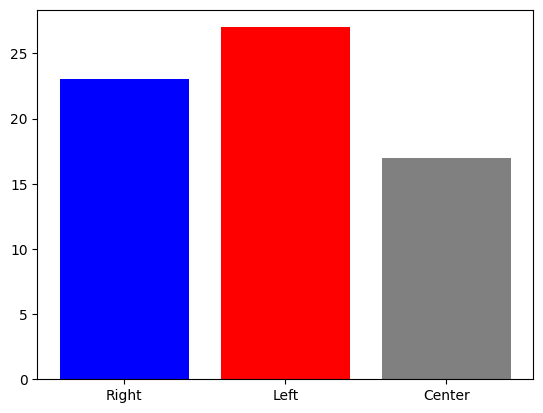

In [27]:
affiliation_counts = {"Right": 0, "Left": 0, "Center": 0}
for affiliation in politicien['political_affiliation']:
    affiliation_counts[affiliation] += 1

plt.bar(affiliation_counts.keys(), affiliation_counts.values(), color=['blue', 'red', 'gray'])
plt.xlabel('Political classes')
plt.ylabel('Number of political peoples')
plt.title('')
plt.show()